In [148]:
import tweepy
import json
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "LQWNbshQoFtQGFkrjGqllz1ll"
consumer_secret = "DzhsKdkWx3ekrOnVzvZyMt8LmNGCFxE966Dg1Kn5XKaD4X2pgE"
app_key = "888605447522967553-6TDfkldFv2dmr4lEiB24DhBcFH02sUZ"
app_secret = "ZDEQHeMcETDZLpK6EKLumbDmNMxh88WLUkpJf2I4HPJCC"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(app_key, app_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [104]:
news_outlet = ['BBC', 'CBS', 'CNN','Fox', 'nytimes' ]

In [121]:
tweet_count = 100

news_sentiment_analysis = pd.DataFrame()

for target_outlet in news_outlets :
    news_media = []
    positive = []
    neutral = []
    negative = []
    compound = []
    create_date = []
    tweets_ago = []

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_outlet, count=tweet_count)

    # Loop through tweets
    i = 0
    for tweet in public_tweets:
        #print(tweet)
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"]
        #Sentiment Analysis
        positive.append(analyzer.polarity_scores(tweet_text)["pos"])
        neutral.append(analyzer.polarity_scores(tweet_text)["neu"])
        negative.append(analyzer.polarity_scores(tweet_text)["neg"])
        compound.append(analyzer.polarity_scores(tweet_text)["compound"])
        create_date.append(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")) 
        news_media.append(tweet['user']['screen_name'])
        tweets_ago.append(i)
        i=i-1               
 

    data = pd.DataFrame({"news_media": news_media,
                         "positive": positive,
                         "neutral": neutral,
                         "negative": negative,
                         "compound": compound,
                         "create_date": create_date,
                         "tweets_ago":tweets_ago
                       })
    news_sentiment_analysis = news_sentiment_analysis.append(data)  

news_sentiment_analysis.to_csv("news_media_sentiment_analysis.csv")
news_sentiment_analysis.set_index('news_media', 'create_date')


,compound,create_date,negative,neutral,positive,tweets_ago
news_media,,,,,,
BBC,0.8299,2018-07-01 20:43:50+00:00,0.000,0.710,0.290,0
BBC,0.6588,2018-07-01 19:36:52+00:00,0.000,0.845,0.155,-1
BBC,0.4019,2018-07-01 19:27:02+00:00,0.000,0.870,0.130,-2
BBC,-0.2957,2018-07-01 19:02:03+00:00,0.176,0.657,0.168,-3
BBC,-0.0516,2018-07-01 18:00:19+00:00,0.273,0.515,0.211,-4
BBC,0.5994,2018-07-01 17:58:17+00:00,0.000,0.822,0.178,-5
BBC,0.0000,2018-07-01 17:07:02+00:00,0.000,1.000,0.000,-6
BBC,0.0000,2018-07-01 16:32:14+00:00,0.000,1.000,0.000,-7
BBC,0.0000,2018-07-01 16:06:03+00:00,0.000,1.000,0.000,-8


The New York Times Sentiment

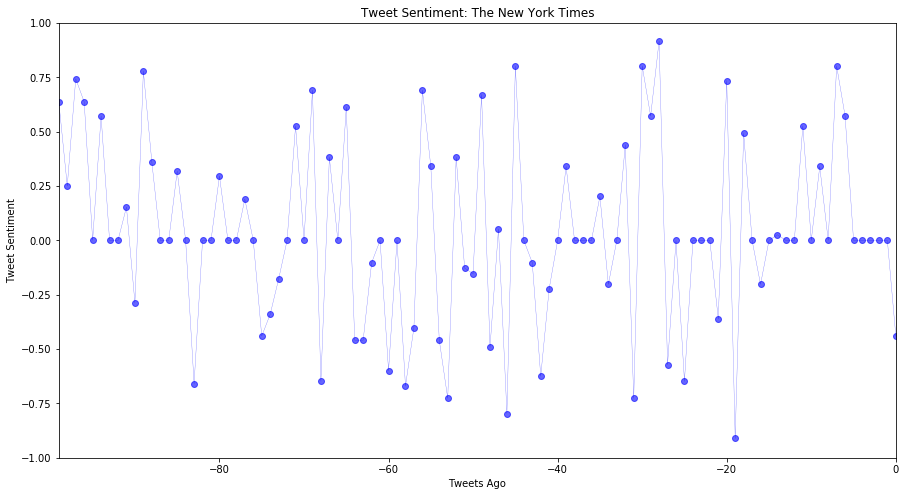

In [144]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
nytimes_tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']

plt.plot(tweets_ago, nytimes_tweet_compound, marker="o", 
               linewidth=0.3, alpha=0.6, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'The New York Times')

plt.savefig("nytimes.png")
plt.show()

CNN Sentiment

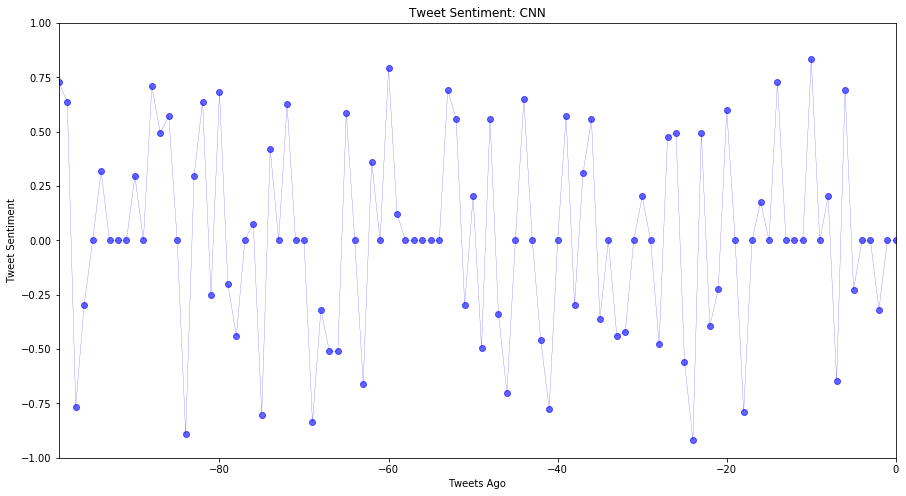

In [132]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
CNN_tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']

plt.plot(tweets_ago, CNN_tweet_compound, marker="o", 
               linewidth=0.3, alpha=0.6, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'CNN')
plt.savefig("CNN.png")
plt.show()

BBC Sentiment

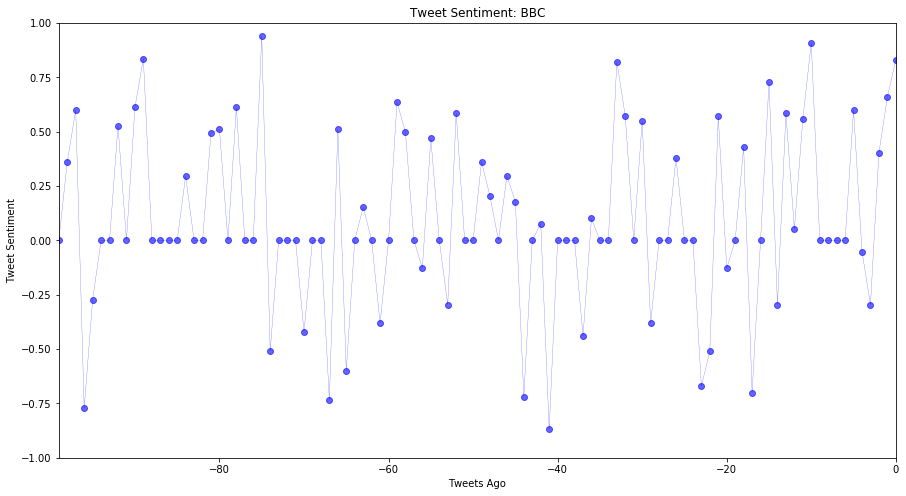

In [134]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
BBC_tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']

plt.plot(tweets_ago, BBC_tweet_compound, marker="o", 
               linewidth=0.3, alpha=0.6, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'BBC')
plt.savefig("BBC.png")
plt.show()

CBS Sentiment

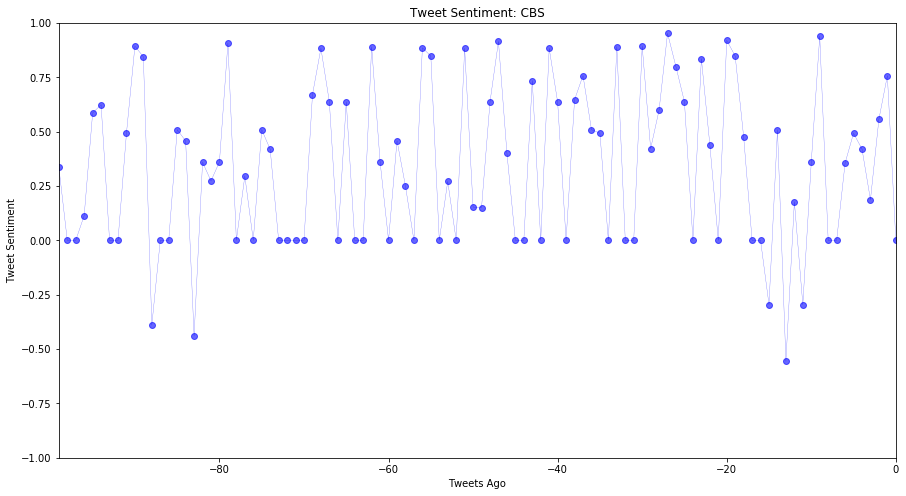

In [124]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
CBS_tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']

plt.plot(tweets_ago, CBS_tweet_compound, marker="o", 
               linewidth=0.3, alpha=0.6, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'CBS')
plt.savefig("CBS.png")
plt.show()

Fox Sentiment

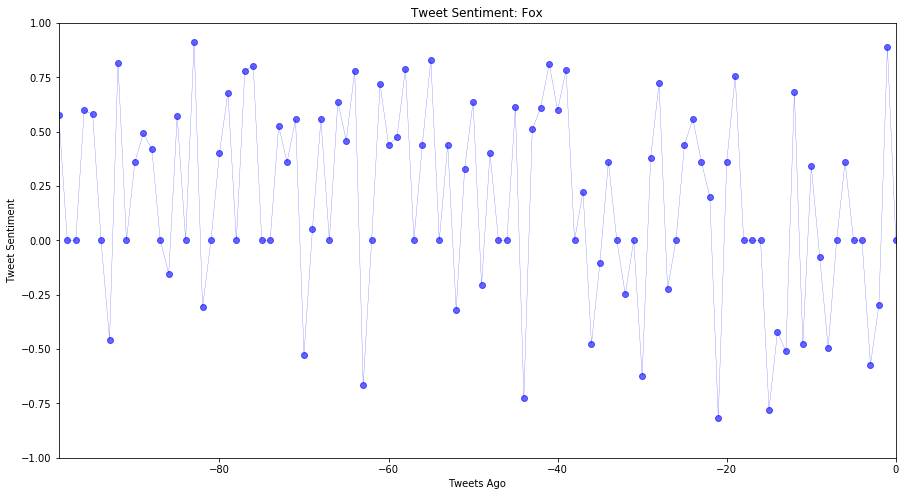

In [135]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
fox_tweet_compound=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']

plt.plot(tweets_ago, fox_tweet_compound, marker="o", 
               linewidth=0.3, alpha=0.6, color="b")

plt.xlim(np.min(tweets_ago),np.max(tweets_ago)) 
plt.ylim([-1,1])

plt.ylabel("Tweet Sentiment")
plt.xlabel("Tweets Ago")
plt.title("Tweet Sentiment: %s" % 'Fox')
plt.savefig("fox.png")
plt.show()

Media Sentiment (Scatter)

Text(0.5,0,'Tweet Ago')

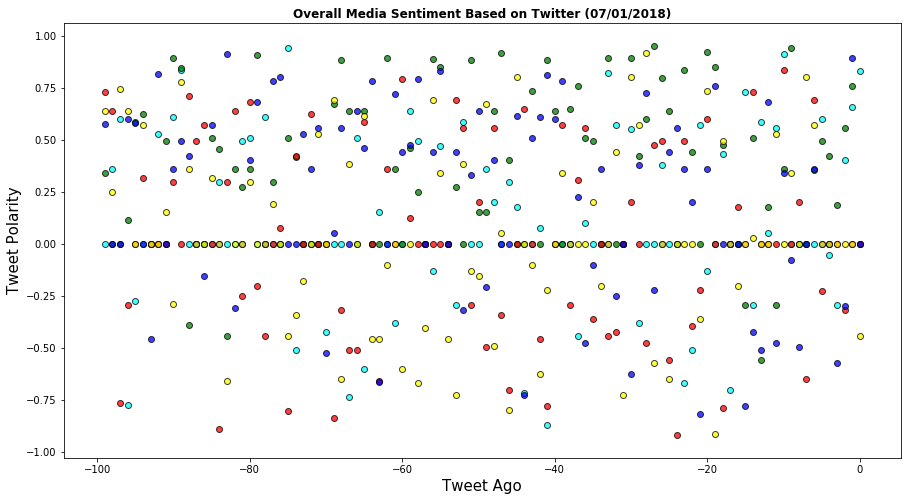

In [155]:
tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['tweets_ago']
bbc=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='BBC']['compound']
plt.scatter(tweets_ago, bbc, marker="o", facecolors="cyan", edgecolors="black",
            alpha=0.75)

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['tweets_ago']
cbs=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CBS']['compound']
plt.scatter(tweets_ago, cbs, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['tweets_ago']
cnn=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='CNN']['compound']
plt.scatter(tweets_ago, cnn, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

tweets_ago=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['tweets_ago']
fox=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='fox']['compound']
plt.scatter(tweets_ago, fox, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

tweets_agotweets_a =news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['tweets_ago']
nytimes=news_sentiment_analysis.loc[news_sentiment_analysis.news_media=='nytimes']['compound']
plt.scatter(tweets_ago, nytimes, marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)

plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Tweet Polarity", fontsize = 15)
plt.xlabel("Tweet Ago", fontsize = 15)

Media Sentiment (Bar)

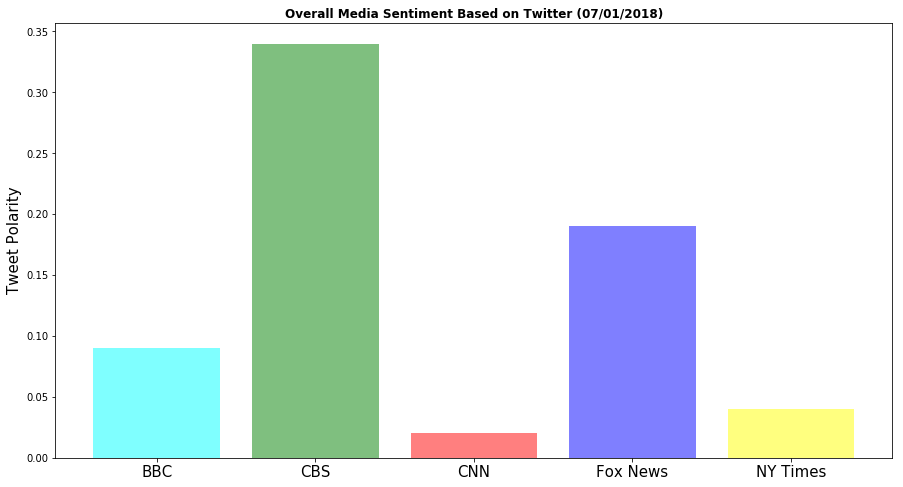

In [156]:
cnn_compound_aggregate = round((CNN_tweet_compound.mean()),2)
bbc_compound_aggregate = round((BBC_tweet_compound.mean()),2)
cbs_compound_aggregate = round((CBS_tweet_compound.mean()),2)
foxnews_compound_aggregate = round((fox_tweet_compound.mean()),2)
nytimes_compound_aggregate = round((nytimes_tweet_compound.mean()),2)


channels = [bbc_compound_aggregate, cbs_compound_aggregate, cnn_compound_aggregate, foxnews_compound_aggregate, nytimes_compound_aggregate]
x_axis = np.arange(len(channels))

plt.bar(x_axis, channels, color=['cyan', 'green', 'red', 'blue', 'yellow'], alpha=0.5, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox News", "NY Times"], fontsize = 15)

plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Tweet Polarity", fontsize = 15)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.savefig("Tushaar_Overall_Media_Sentiment.png") # saving the graph as a .png image
plt.show()

In [113]:
print (cnn_compound_aggregate)
print (bbc_compound_aggregate)
print (cbs_compound_aggregate)
print (foxnews_compound_aggregate)
print (nytimes_compound_aggregate)

0.02
0.09
0.34
0.19
0.05
